In [2]:
import pandas as pd
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 
from googletrans import Translator, constants
translator = Translator()
geolocator = Nominatim(user_agent="geoapiExercises")

# Data cleaning & merging

In [34]:
full_combined_dataset = pd.read_csv('clean_data.csv', delimiter=',', encoding="utf-8")
full_combined_dataset = full_combined_dataset.drop(columns=full_combined_dataset.columns[0])



print(full_combined_dataset)

       Latitude  Longitude   Depth  Magnitude  Month   Day    Year  \
0       19.2460   145.6160  131.60        6.0      1   2.0  1965.0   
1       53.0080  -162.0080   17.80        6.4      2   6.0  1965.0   
2       53.1910  -161.8590   22.50        6.3      2   6.0  1965.0   
3       21.5270   143.0810  340.00        5.6      2  17.0  1965.0   
4       53.2920  -162.3310   20.00        5.7      3  13.0  1965.0   
...         ...        ...     ...        ...    ...   ...     ...   
18720    6.1142   -82.5906   10.00        5.6     11  12.0  2016.0   
18721  -35.2021    54.0219   10.00        5.5     12   1.0  2016.0   
18722   11.0316   -60.9005   31.75        5.9     12   6.0  2016.0   
18723  -10.1785   160.9149   10.00        6.0     12  20.0  2016.0   
18724  -10.1549   160.7816   10.38        5.5     12  20.0  2016.0   

         Country Name  Density  Population  
0       United States       21   194303000  
1       United States       21   194303000  
2       United States   

In [146]:
X = full_combined_dataset.iloc[:, [0,1,2,3,6]].values

In [147]:
print(X)
data = X

[[  19.246   145.616   131.6       6.     1965.    ]
 [  53.008  -162.008    17.8       6.4    1965.    ]
 [  53.191  -161.859    22.5       6.3    1965.    ]
 ...
 [  11.0316  -60.9005   31.75      5.9    2016.    ]
 [ -10.1785  160.9149   10.        6.     2016.    ]
 [ -10.1549  160.7816   10.38      5.5    2016.    ]]


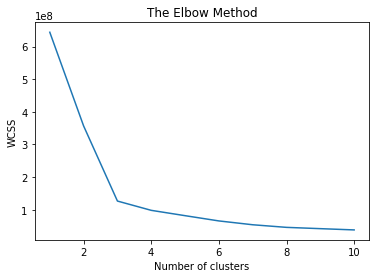

In [148]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 6)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

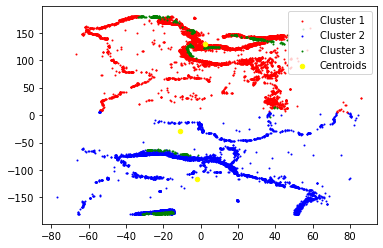

In [150]:
# kplot = plt.axes(projection='3d')
# xline = np.linspace(0, 15, 1000)
# yline = np.linspace(0, 15, 1000)
# zline = np.linspace(0, 15, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 1, c = 'purple', label = 'Cluster 6')
# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 1, c = 'olive', label = 'Cluster 7')
# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 1, c = 'gray', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_kmeans)
print(score)